# This requires a set of geospatial packages not included in ewatercycle


In [1]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import IFrame
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
import os
import xarray as xrb
from datetime import datetime
from pathlib import Path

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
path = Path.cwd()

figure_path = path / "Figures"
analysis_path = path / "Analysis" 

## load characteristic files

In [181]:
geospatial_files = analysis_path / "camels_characteristics" 

In [131]:
lst_paths_characteristic = list(geospatial_files.glob('*.feather'))

In [132]:
lst_char_df = []
for path in lst_characteristic_df:
    df = pd.read_feather(path).set_index('gauge_id')
    df.index.name = "HRU_id"
    lst_char_df.append(df)

In [133]:
df_char_names = lst_char_df[0]
df_char_names.head(3)

,huc_02,gauge_name
HRU_id,,
1013500,1,"Fish River near Fort Kent, Maine"
1022500,1,"Narraguagus River at Cherryfield, Maine"
1030500,1,"Mattawamkeag River near Mattawamkeag, Maine"


In [32]:
df_char_clim = lst_char_df[1]
df_char_clim.head(3)

,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
HRU_id,,,,,,,,,,,
1013500,3.126679,1.971555,0.187940,0.313440,0.630559,12.95,1.348958,son,202.20,3.427119,mam
1022500,3.608126,2.119256,-0.114530,0.245259,0.587356,20.55,1.205279,son,233.65,3.662226,jja
1030500,3.274405,2.043594,0.047358,0.277018,0.624111,17.15,1.207746,son,215.60,3.514262,djf


In [30]:
df_char_geol = lst_char_df[2]
df_char_geol.head(3)

,geol_1st_class,glim_1st_class_frac,geol_2nd_class,glim_2nd_class_frac,carbonate_rocks_frac,geol_porostiy,geol_permeability
HRU_id,,,,,,,
1013500,Siliciclastic sedimentary rocks,0.815904,Basic volcanic rocks,0.179729,0.00000,0.1714,-14.7019
1022500,Acid plutonic rocks,0.590658,Siliciclastic sedimentary rocks,0.164618,0.00000,0.0710,-14.2138
1030500,Siliciclastic sedimentary rocks,0.573305,Metamorphics,0.287010,0.05214,0.1178,-14.4918


In [35]:
df_char_hydro= lst_char_df[3]
df_char_hydro.head(3)

,q_mean,runoff_ratio,slope_fdc,baseflow_index,stream_elas,q5,q95,high_q_freq,high_q_dur,low_q_freq,low_q_dur,zero_q_freq,hfd_mean
HRU_id,,,,,,,,,,,,,
1013500,1.699155,0.543437,1.528219,0.585226,1.845324,0.241106,6.373021,6.10,8.714286,41.35,20.170732,0.0,207.25
1022500,2.173062,0.602269,1.776280,0.554478,1.702782,0.204734,7.123049,3.90,2.294118,65.15,17.144737,0.0,166.25
1030500,1.820108,0.555859,1.871110,0.508441,1.377505,0.107149,6.854887,12.25,7.205882,89.25,19.402174,0.0,184.90


In [38]:
df_char_soil = lst_char_df[4]
df_char_soil.head(3)

,soil_depth_pelletier,soil_depth_statsgo,soil_porosity,soil_conductivity,max_water_content,sand_frac,silt_frac,clay_frac,water_frac,organic_frac,other_frac
HRU_id,,,,,,,,,,,
1013500,7.404762,1.248408,0.461149,1.106522,0.558055,27.841827,55.156940,16.275732,5.376698,0.408717,0.000000
1022500,17.412808,1.491846,0.415905,2.375005,0.626229,59.390156,28.080937,12.037646,1.226913,0.000000,0.358472
1030500,19.011414,1.461363,0.459091,1.289807,0.653020,32.235458,51.779182,14.776824,1.634345,1.330278,0.022016


In [39]:
df_char_vege = lst_char_df[5]
df_char_vege.head(3)

,frac_forest,lai_max,lai_diff,gvf_max,gvf_diff,dom_land_cover_frac,dom_land_cover,root_depth_50,root_depth_99
HRU_id,,,,,,,,,
1013500,0.9063,4.167304,3.340732,0.804567,0.371648,0.883452,Mixed Forests,NaN,NaN
1022500,0.9232,4.871392,3.746692,0.863936,0.337712,0.820493,Mixed Forests,0.237435,2.238444
1030500,0.8782,4.685200,3.665543,0.858502,0.351393,0.975258,Mixed Forests,NaN,NaN


In [45]:
gdf_catchments = gpd.read_file(geospatial_files / "catchments.gpkg")
gdf_catchments = gdf_catchments[['hru_id','geometry']]
gdf_catchments = gdf_catchments.set_index('hru_id')
gdf_catchments.index.name = "HRU_id"

<Axes: >

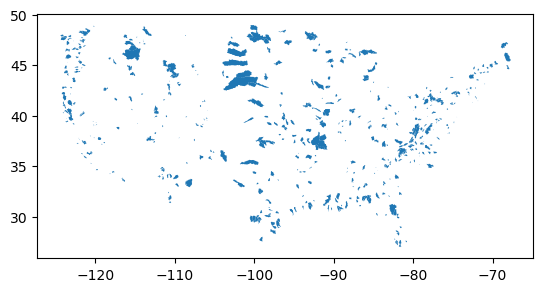

In [46]:
gdf_catchments.plot()

In [49]:
gdf_gauges = gpd.read_file(geospatial_files / "gauges.gpkg")
gdf_gauges = gdf_gauges.set_index('gauge_id')
gdf_gauges.index.name = "HRU_id"
gdf_gauges

,gauge_lat,gauge_lon,elev_mean,slope_mean,area_gages2,area_geospa_fabric,geometry
HRU_id,,,,,,,
1013500,47.23739,-68.58264,250.31,21.64152,2252.70,2303.95,POINT (-68.58264 47.23739)
1022500,44.60797,-67.93524,92.68,17.79072,573.60,620.38,POINT (-67.93524 44.60797)
1030500,45.50097,-68.30596,143.80,12.79195,3676.17,3676.09,POINT (-68.30596 45.50097)
1031500,45.17501,-69.31470,247.80,29.56035,769.05,766.53,POINT (-69.31470 45.17501)
1047000,44.86920,-69.95510,310.38,49.92122,909.10,904.94,POINT (-69.95510 44.86920)
...,...,...,...,...,...,...,...
14309500,42.80400,-123.61091,709.83,110.42527,224.92,226.31,POINT (-123.61091 42.80400)
14316700,43.34984,-122.72894,952.26,119.08920,587.90,588.01,POINT (-122.72894 43.34984)
14325000,42.89150,-124.07065,656.53,124.96889,443.07,444.92,POINT (-124.07065 42.89150)


In [115]:
hru_id_cal = ['01137500',
            '01139800',
            '01187300',
            '01052500',
            '01073000',
            '01181000',
            '01169000',
            '01013500',
            '01123000',
            '01055000',
            '01047000',
            '04296000',
            '01022500',
            '01134500',
            '01170100',
            '01142500',
            '01144000',
            '01054200',
            '01031500',
            '01139000',
            '01057000',
            '01078000',
            '01162500',
            '01030500',
            '01118300',
            '01121000']
for index, ids in enumerate(hru_id_cal):
    hru_id_cal[index] = int(ids)
gdf_callibration_catchment = gdf_catchments.loc[hru_id_cal]
gdf_callibration_gauges = gdf_gauges.loc[hru_id_cal]

### plotting to check 

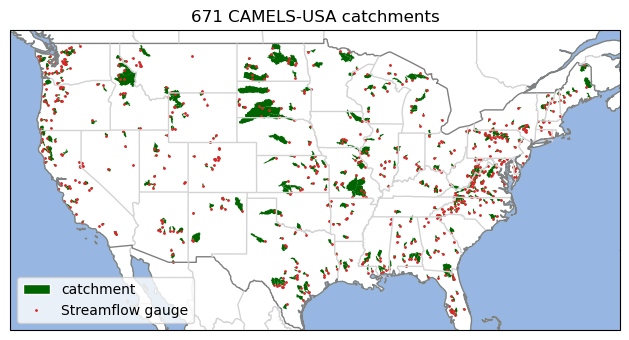

In [51]:
# set up background maps
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

# add legend properties
ms = 1
color = "C3"
catchment_color = "darkgreen"
gdf_catchments.plot(ax=ax,facecolor=catchment_color)
gdf_gauges.plot(ax=ax,markersize=ms,color=color)

ax.set_title(f"{len(gdf_catchments)} CAMELS-USA catchments")
# add legend
legend_gauges = matplotlib.lines.Line2D([],[],color=color,markersize=ms,marker="o",linewidth=0,label='Streamflow gauge')
legend_catchments = matplotlib.patches.Patch(facecolor=catchment_color, edgecolor='w',label=f"catchment")
ax.legend(loc='best', handles=ax.get_legend_handles_labels()[0] + [legend_catchments,legend_gauges])
          
plt.tight_layout()
# plt.savefig(fr'{figures_path}\CAMELS-USA-catchments-with_gauges.png',bbox_inches="tight")

## load results

In [134]:
ds = xr.open_dataset(analysis_path / 'results_analysis_229_catchments.nc')

In [163]:
df_res_all_ran = pd.read_feather(analysis_path / 'all_catchments_NSE.feather')

df_res_all = pd.read_feather(analysis_path / 'catchments_NSE_gt_0.feather')
df_res_all['HRU_id'] = df_res_all['HRU_id'].astype(int)
df_res_all = df_res_all.set_index('HRU_id').drop(columns='dropped')

df_res_selected = pd.read_feather(analysis_path / 'selected_catchments.feather')
df_res_selected.index = df_res_selected.index.astype(int)

In [164]:
len(df_res_all), len(df_res_selected)

(329, 203)

## make maps

In [165]:
gdf_catchments_nse = gdf_catchments.copy()

In [166]:
gdf_catchments_nse['NSE_mean'] = gdf_catchments_nse.apply(lambda x: df_res_all.loc[int(x.name),"NSE_mean"] 
                                                          if x.name in df_res_all.index 
                                                          else np.nan, 
                                                          axis=1)
gdf_catchments_nse['NSE_mean_log'] = gdf_catchments_nse.apply(lambda x: df_res_all.loc[int(x.name),"NSE_mean_log"] 
                                                              if x.name in df_res_all.index 
                                                              else np.nan, 
                                                              axis=1)

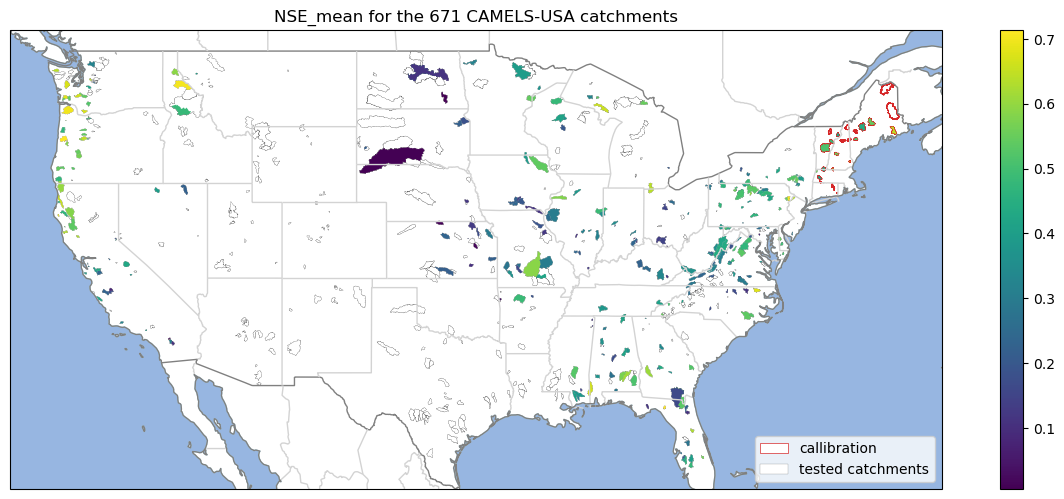

In [186]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

col = "NSE_mean"
custom_cmap = "viridis"
gdf_catchments_nse.plot(ax=ax,column=col, cmap=custom_cmap, legend=True,)
                    # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})

callibration_kwargs = dict(facecolor="white", edgecolor="C3",lw=0.5,zorder=-1)
gdf_callibration_catchment.plot(ax=ax, **callibration_kwargs)

catchment_kwargs = dict(facecolor="white", edgecolor="k",lw=0.1,zorder=-2)
gdf_catchments.plot(ax=ax, **catchment_kwargs)


# add legend
legend_cal = matplotlib.patches.Patch(**callibration_kwargs,label=f"callibration")
legend_catchments = matplotlib.patches.Patch(**catchment_kwargs,label=f"tested catchments")
ax.legend(loc='lower right', handles=ax.get_legend_handles_labels()[0] + [legend_cal,legend_catchments])

title = f"{col} for the {len(gdf_catchments_nsegdf_catchments_nse)} CAMELS-USA catchments"
ax.set_title(title)
          
plt.tight_layout()
title = title.replace(' ','_')
# plt.savefig(figure_path / (title + '.png'),bbox_inches="tight",dpi=100)

USA_extent = ax.get_extent()

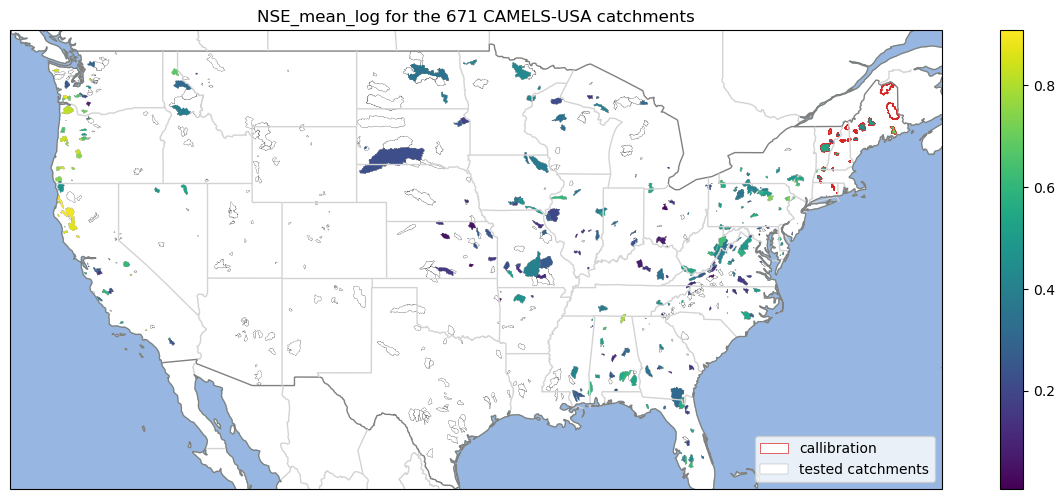

In [187]:
# set up background maps
plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none')
ax.add_feature(country_borders, edgecolor='gray')

state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
ax.add_feature(state_borders, edgecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, edgecolor='lightblue')

col = "NSE_mean_log"
custom_cmap = "viridis"
gdf_catchments_nse.plot(ax=ax,column=col, cmap=custom_cmap, legend=True,)
                    # legend_kwds={"loc": "center left", "bbox_to_anchor": (1, .7)})

callibration_kwargs = dict(facecolor="white", edgecolor="C3",lw=0.5,zorder=-1)
gdf_callibration_catchment.plot(ax=ax, **callibration_kwargs)

catchment_kwargs = dict(facecolor="white", edgecolor="k",lw=0.1,zorder=-2)
gdf_catchments.plot(ax=ax, **catchment_kwargs)


# add legend
legend_cal = matplotlib.patches.Patch(**callibration_kwargs,label=f"callibration")
legend_catchments = matplotlib.patches.Patch(**catchment_kwargs,label=f"tested catchments")
ax.legend(loc='lower right', handles=ax.get_legend_handles_labels()[0] + [legend_cal,legend_catchments])

title = f"{col} for the {len(gdf_catchments_nse)} CAMELS-USA catchments"
ax.set_title(title)
          
plt.tight_layout()
title = title.replace(' ','_')
plt.savefig(figure_path / (title + '.png'),bbox_inches="tight",dpi=100)

USA_extent = ax.get_extent()